<a href="https://colab.research.google.com/github/rah1n/Classify/blob/main/bunryuhwa_gwajae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기초작업

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
from google.colab import drive
drive.mount('/content/drive')
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
!pip install mglearn 
!pip install --upgrade joblib==1.1.0
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets

# 데이터 분석

들어가기 앞서, 분석할 데이터를 선택하기 위해 데이터를 확인한다.

In [ ]:
hdata=pd.read_csv('/content/drive/My Drive/아비혁/health_data.csv')
print(hdata.columns)
display(hdata.info())
display(hdata.head())

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)   

None

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [ ]:
hdata.describe()

,기준년도,가입자일련번호,시도코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),...,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


해당 데이터들 중 수축기혈압, 체중, 트리글리세라이드를 선택해 분석하기로 하였다.

# 데이터 정리

편한 분석을 위해 사용할 데이터를 골라내어 s_hdata로 재정의하였다.

In [ ]:
s_hdata=hdata.loc[:, ['체중(5Kg 단위)', '수축기혈압', '트리글리세라이드']]
s_hdata.head(10)

,체중(5Kg 단위),수축기혈압,트리글리세라이드
0,60,127.0,58.0
1,65,110.0,NaN
2,55,123.0,NaN
3,70,134.0,NaN
4,50,144.0,171.0
5,85,114.0,183.0
6,80,112.0,265.0
7,65,131.0,NaN
8,50,136.0,61.0
9,45,124.0,NaN


트리글리세라이드 값이 NaN인 결측치가 상당히 많다. 따라서 이를 제거한다.

In [ ]:
hdata.isnull().sum()

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

In [ ]:
hdata=hdata.dropna()
hdata.isnull().sum()

기준년도           0
가입자일련번호        0
시도코드           0
성별코드           0
연령대코드(5세단위)    0
신장(5Cm단위)      0
체중(5Kg 단위)     0
허리둘레           0
시력(좌)          0
시력(우)          0
청력(좌)          0
청력(우)          0
수축기혈압          0
이완기혈압          0
식전혈당(공복혈당)     0
총콜레스테롤         0
트리글리세라이드       0
HDL콜레스테롤       0
LDL콜레스테롤       0
혈색소            0
요단백            0
혈청크레아티닌        0
(혈청지오티)AST     0
(혈청지오티)ALT     0
감마지티피          0
흡연상태           0
음주여부           0
구강검진수검여부       0
치아우식증유무        0
치석             0
데이터공개일자        0
dtype: int64

결측치가 모두 제거되었다.

In [ ]:
display(hdata.head())
display(hdata.info())

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,0.7,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,1.0,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,...,0.8,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/2021
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,...,1.4,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/2021
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,...,1.0,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/2021


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         1249 non-null   int64  
 1   가입자일련번호      1249 non-null   int64  
 2   시도코드         1249 non-null   int64  
 3   성별코드         1249 non-null   object 
 4   연령대코드(5세단위)  1249 non-null   int64  
 5   신장(5Cm단위)    1249 non-null   int64  
 6   체중(5Kg 단위)   1249 non-null   int64  
 7   허리둘레         1249 non-null   float64
 8   시력(좌)        1249 non-null   float64
 9   시력(우)        1249 non-null   float64
 10  청력(좌)        1249 non-null   int64  
 11  청력(우)        1249 non-null   int64  
 12  수축기혈압        1249 non-null   float64
 13  이완기혈압        1249 non-null   float64
 14  식전혈당(공복혈당)   1249 non-null   float64
 15  총콜레스테롤       1249 non-null   float64
 16  트리글리세라이드     1249 non-null   float64
 17  HDL콜레스테롤     1249 non-null   float64
 18  LDL콜레스테롤     1249 non-null   float64
 19  혈색소   

None

총 1249개의 데이터가 남았다.

종속변수인 수축기혈압 데이터를 수치 별로 분류하였다.
실제로는 정상과 1기고혈압 사이에 한 단계가 더 있지만, 분석의 편리를 위해 정상에 포함시켰다.

In [ ]:
rating=[]
for row in hdata['수축기혈압']:
  if row < 140 : rating.append('정상')
  elif row < 160 : rating.append('1기고혈압')
  else: rating.append('2기고혈압')
hdata['수축기혈압']=rating

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# **의사결정나무**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X=hdata.loc[:, ['체중(5Kg 단위)', '트리글리세라이드']]
y=hdata['수축기혈압']


독립변수로 체중과 트리글리세라이드, 종속변수로 수축기혈압을 설정하였다.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=10)

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=10)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.872
시험용 데이터 정확도: 0.902


테스트 사이즈를 0.4, 랜덤 수치는 10으로 설정하여 학습용 데이터는 0.872, 시험용 데이터는 0.902의 정확도를 얻었다. 0.9 이상의 정확도를 얻기 어려워 해당 수치대로 진행하도록 한다.

In [ ]:
class_names = ['정상', '1기고혈압', '2기고혈압']
feature_names = X.columns

종속변수를 앞서 정의한 것과 동일하게 '정상', '1기고혈압', '2기고혈압'으로 정의하였고, 독립변수는 별도의 정의 없이 체중과 트리글리세라이드로 진행하였다.

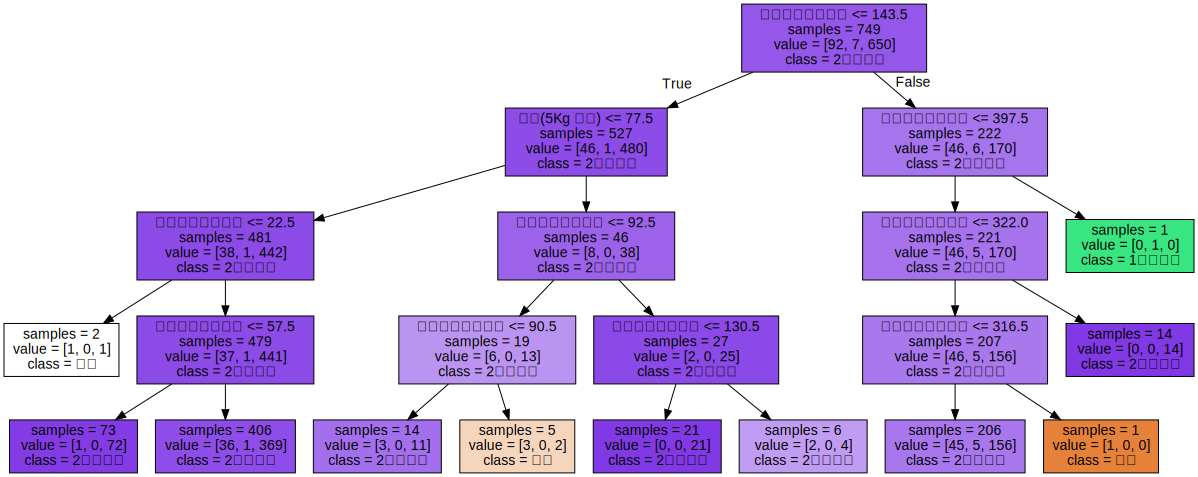

In [ ]:
export_graphviz(tree, out_file="tree.dot", class_names=class_names,
                feature_names=feature_names, impurity=False, filled=True)

with open("tree.dot") as f:
  dot_graph=f.read()

display(graphviz.Source(dot_graph))

시각화 결과는 다음과 같다. 체중보다 트리글리세라이드에 좀 더 중점이 갔음을 볼 수 있다.

# 그래디언트 부스팅

의사결정나무로는 충분한 분류가 되지 않는다 판단하여 그래디언트 부스팅을 실행하였다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.915
시험용 데이터 세트 정확도: 0.850


아무런 조정 없이 정확도를 테스트한 결과, 상당히 높은 정확도가 나왔다.

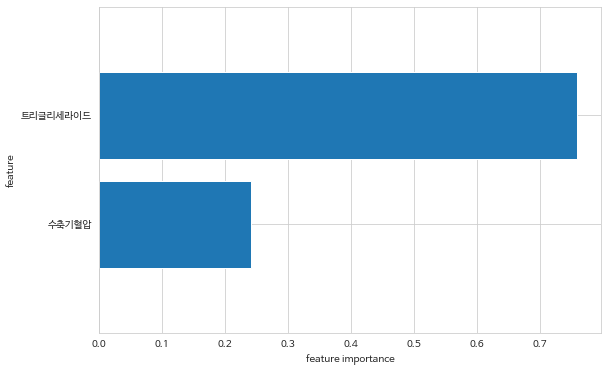

In [ ]:
def plot_feature_importances_hdata(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(s_hdata.columns[1:])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), s_hdata.columns[1:])
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_hdata(gbrt)

수축기혈압보다 트리글리세라이드가 더 중요한 변수로 확인되었다.

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=5)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.941
시험용 데이터 세트 정확도: 0.834


모형의 깊이를 5로 설정하자, 학습데이터는 정확도가 더 올라갔고 시험데이터는 약간 낮아졌다.

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.923
시험용 데이터 세트 정확도: 0.837


학습속도를 조정하자, 마찬가지의 결과가 나왔다.

In [ ]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=5, learning_rate=0.2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.956
시험용 데이터 세트 정확도: 0.821


깊이와 학습속도를 모두 조정하자 학습 데이터 정확도는 가장 높은 결과값이 나왔고, 시험용 데이터는 가장 낮은 값이 나왔다.
학습량이 차이가 나게 되는 만큼 시험용 데이터는 과적합 현상이 생긴 것으로 추측된다.

# 교차검증

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris

In [ ]:
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores)
print("Gradient boosting: ", gbrt_scores) 
print("Decision tree: {:.3f}".format(dt_scores.mean()))
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  UserWarning,


Accuracy
Decision tree:  [0.89361702 0.87234043 0.88297872 0.88297872 0.88297872 0.88297872
 0.89247312 0.86021505 0.89247312 0.87096774]
Gradient boosting:  [0.82978723 0.74468085 0.84042553 0.82978723 0.82978723 0.81914894
 0.82795699 0.76344086 0.8172043  0.86021505]
Decision tree: 0.881
Gradient boosting :0.816


교차검증 결과, 정확도는 분류때와 비교해 떨어졌음을 알 수 있다. 기존의 학습모델이 과적합되어있었음을 알 수 있다.

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  UserWarning,


Accuracy mean -- StratifiedKFold 이용
Decision tree :0.855
Gradient boosting :0.789


StratifiedKFold 를 사용해 교차검증 한 결과, 정확도는 더 떨어졌다. 검증시 각 항목마다 클래스 분포가 동일하지 않았음을 알 수 있다.